In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.svm import SVR
import xgboost as xgb
import time

### Loading dataset sample

In [2]:
data = pd.read_csv("../dataset/dataset_1.csv", sep = ";").drop("Unnamed: 0", 1)
std = pd.read_csv("../dataset/std.csv", squeeze = True, sep = ";", index_col=0)
mean = pd.read_csv("../dataset/mean.csv", squeeze = True, sep = ";", index_col=0)
data.describe()

NU_IDADE  SG_UF_RESIDENCIA       TP_SEXO  TP_ESTADO_CIVIL  \
count  3.055735e+06      3.055735e+06  3.055735e+06     3.055735e+06   
mean   1.305231e-13      4.712977e-13  9.892555e-13    -3.162966e-13   
std    1.000000e+00      1.000000e+00  1.000000e+00     1.000000e+00   
min   -8.341859e-01     -1.853710e+00 -8.295309e-01    -2.576811e+00   
25%   -5.522251e-01     -7.922345e-01 -8.295309e-01    -1.632265e-01   
50%   -4.112447e-01      3.872238e-03 -8.295309e-01    -1.632265e-01   
75%    1.526769e-01      7.999790e-01  1.205500e+00    -1.632265e-01   
max    9.316403e+00      1.596086e+00  1.205500e+00     7.077527e+00   

        TP_COR_RACA  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU     TP_ESCOLA  \
count  3.055735e+06     3.055735e+06     3.055735e+06  3.055735e+06   
mean  -1.589560e-13     3.798549e-13    -2.058649e-12  3.400945e-13   
std    1.000000e+00     1.000000e+00     1.000000e+00  1.000000e+00   
min   -2.114661e+00    -7.857410e-01    -7.251758e-01 -7.270682e-01   
25%   -1.125402e+00    -7.857410e-01    -7.251758e-01 -7.270682e-01   
50%   -1.361436e-01    -7.857410e-01    -4.733100e-01 -7.270682e-01   
75%    8.531149e-01     1.253810e+00     2.822874e-01  8.980900e-01   
max    2.831632e+00     3.293360e+00     2.549080e+00  2.523248e+00   

         NU_NOTA_CN    NU_NOTA_CH  ...          Q017          Q018  \
count  3.055735e+06  3.055735e+06  ...  3.055735e+06  3.055735e+06   
mean  -1.229368e-13 -1.694117e-13  ...  8.525969e-13 -3.728231e-12   
std    1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00   
min   -2.009952e+00 -2.476796e+00  ... -1.449663e-01 -4.803079e-01   
25%   -7.908197e-01 -7.369426e-01  ... -1.449663e-01 -4.803079e-01   
50%   -9.647963e-02  4.338606e-02  ... -1.449663e-01 -4.803079e-01   
75%    7.310768e-01  7.309395e-01  ... -1.449663e-01 -4.803079e-01   
max    3.072456e+00  3.055404e+00  ...  2.613209e+01  2.081997e+00   

               Q019          Q020          Q021          Q022          Q023  \
count  3.055735e+06  3.055735e+06  3.055735e+06  3.055735e+06  3.055735e+06   
mean   9.475386e-13 -3.672455e-13 -1.309745e-12 -1.927421e-13  1.929039e-13   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.763884e+00 -6.570567e-01 -5.210688e-01 -2.253813e+00 -5.626111e-01   
25%   -4.169220e-01 -6.570567e-01 -5.210688e-01 -3.796941e-01 -5.626111e-01   
50%   -4.169220e-01 -6.570567e-01 -5.210688e-01 -3.796941e-01 -5.626111e-01   
75%    9.300394e-01  1.521938e+00 -5.210688e-01  5.573653e-01 -5.626111e-01   
max    3.623962e+00  1.521938e+00  1.919132e+00  1.494425e+00  1.777426e+00   

               Q024          Q025        Regiao  
count  3.055735e+06  3.055735e+06  3.055735e+06  
mean  -9.430818e-13  7.430506e-13 -1.985456e-12  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -8.992025e-01 -1.885625e+00 -1.718776e+00  
25%   -8.992025e-01  5.303279e-01 -8.815104e-01  
50%    4.048246e-01  5.303279e-01 -4.424493e-02  
75%    4.048246e-01  5.303279e-01  7.930205e-01  
max    4.316906e+00  5.303279e-01  1.630286e+00  

[8 rows x 40 columns]

In [3]:
# Lets consider only NU_NOTA_MT for now

data = data.drop(["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"], 1)

## Feature selection

### Correlation Matrix

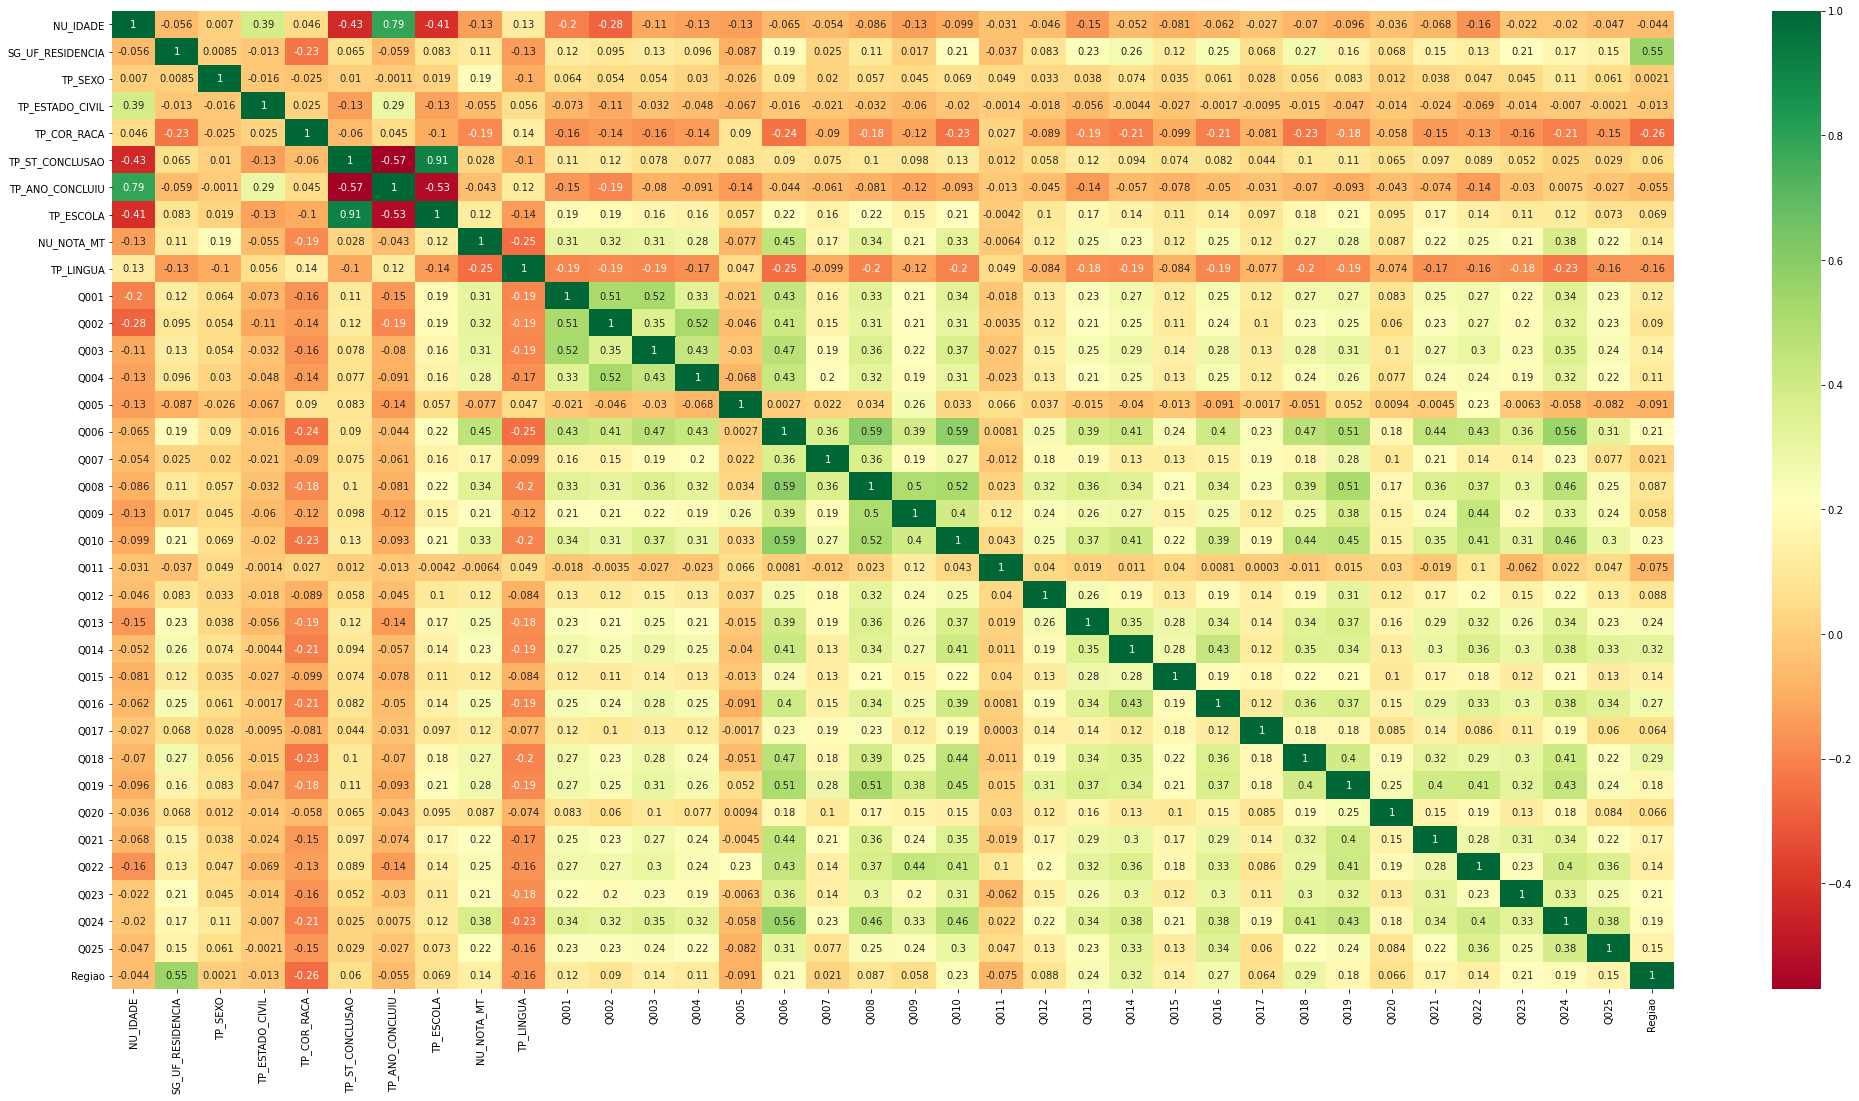

In [4]:
plt.figure(figsize=(35, 18))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.savefig("../pictures/Matematica/Matriz_correlação.png")

### Removing correlated features

In [5]:
data = data.drop(["TP_ANO_CONCLUIU", "TP_ST_CONCLUSAO"], 1)

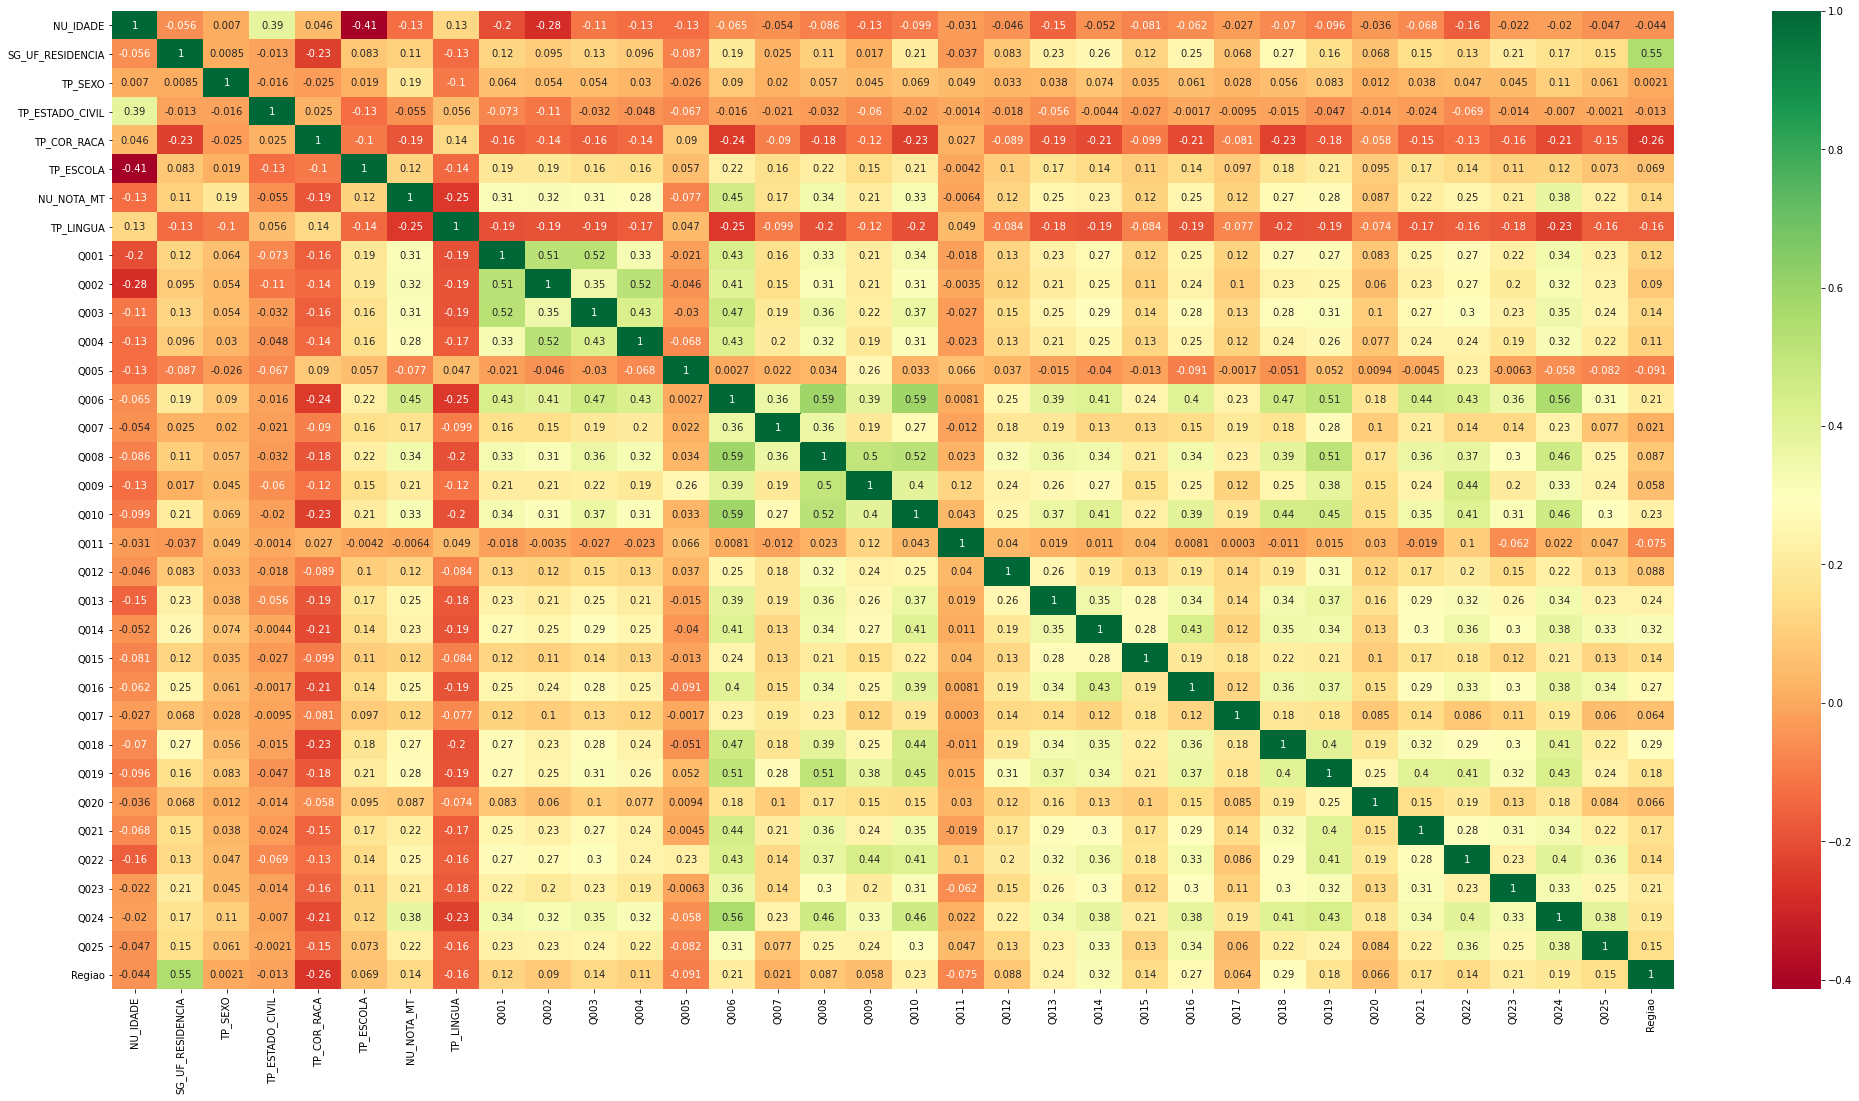

In [6]:
plt.figure(figsize=(35, 18))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")
plt.savefig("../pictures/Matematica/Matriz_correlação_apos_remocao.png")

### Gini index

Running time: 1525.9128680229187


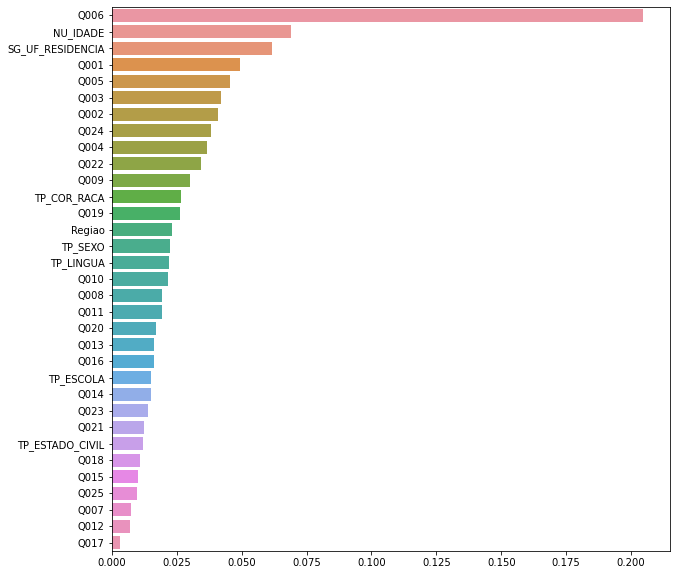

In [7]:
start = time.time()
model = RandomForestRegressor(n_jobs = -1).fit(data.drop("NU_NOTA_MT", 1), data["NU_NOTA_MT"])
gini_importance = pd.Series(model.feature_importances_, index = data.drop("NU_NOTA_MT", 1).columns)
gini_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(x = gini_importance, y = gini_importance.index)
plt.savefig("../pictures/Matematica/Gini.png")
end = time.time()
print("Running time: " + str(end-start))

### Weight index with XGBoost

Running time: 225.36902117729187


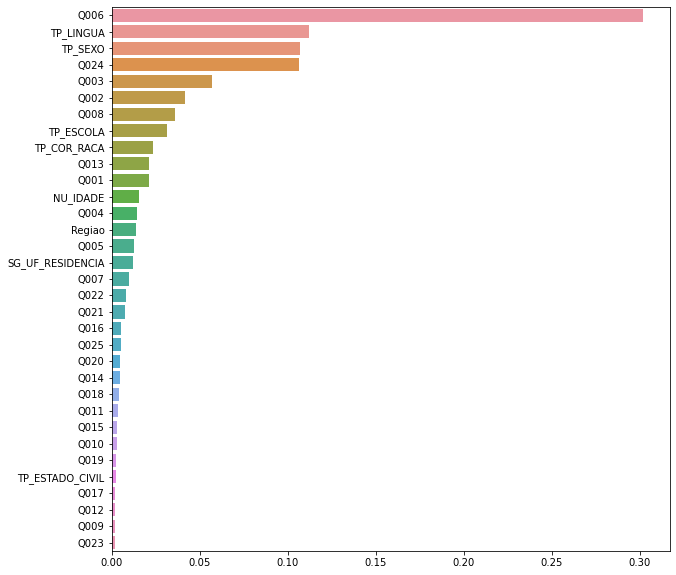

In [8]:
start = time.time()
model = xgb.XGBRegressor(n_jobs = -1).fit(data.drop("NU_NOTA_MT", 1), data["NU_NOTA_MT"])
gini_importance = pd.Series(model.feature_importances_, index = data.drop("NU_NOTA_MT", 1).columns)
gini_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(x = gini_importance, y = gini_importance.index)
plt.savefig("../pictures/Matematica/Weight.png")
end = time.time()
print("Running time: " + str(end-start))

### Mutual Information method

Running time: 2123.120918750763


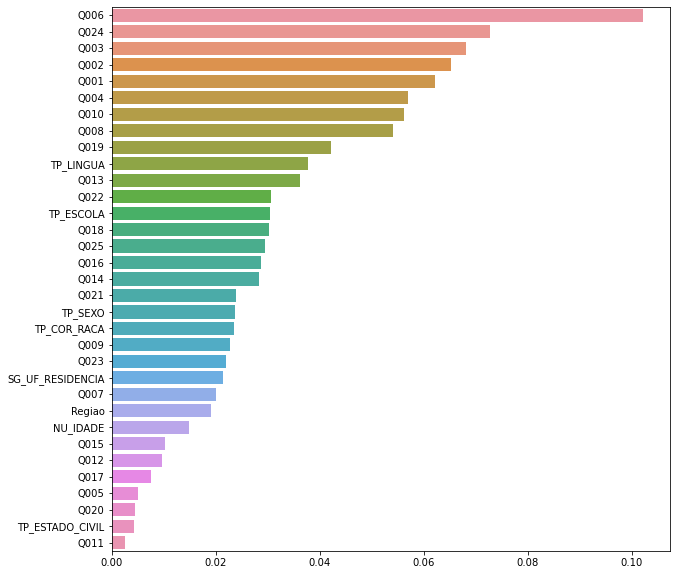

In [9]:
start = time.time()
sample = data.sample(70000)
mi = mutual_info_regression(sample.drop("NU_NOTA_MT", 1), sample["NU_NOTA_MT"])
mi_importance = pd.Series(mi, index = sample.drop("NU_NOTA_MT", 1).columns)
mi_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10, 10))
sns.barplot(x = mi_importance, y = mi_importance.index)
plt.savefig("../pictures/Matematica/Mutual_Information.png")
end = time.time()
print("Running time: " + str(end-start))

### Permutation importance with RandomForest

Running time: 14998.149099349976


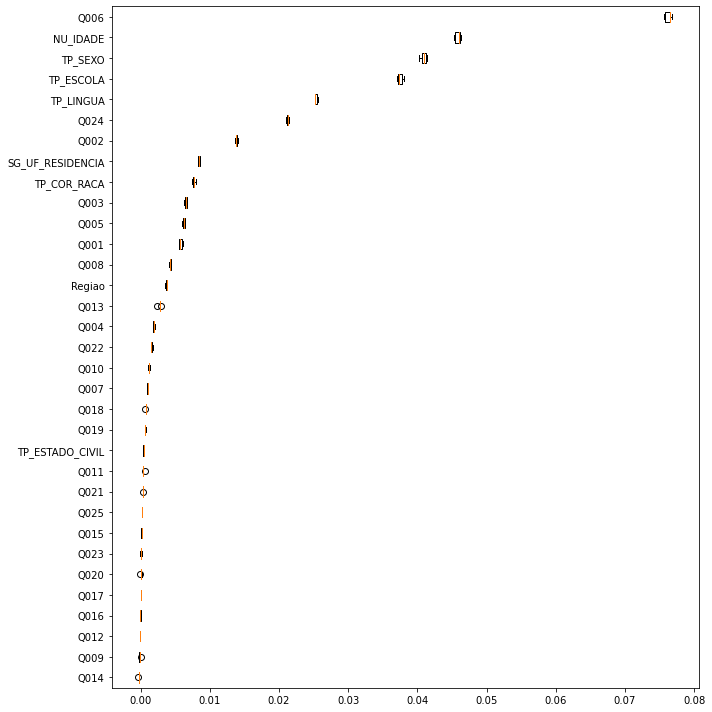

In [10]:
start = time.time()
train, test = train_test_split(data, test_size = 0.3)
model = RandomForestRegressor(n_jobs = -1).fit(train.drop("NU_NOTA_MT", 1), train["NU_NOTA_MT"])
r = permutation_importance(model, test.drop("NU_NOTA_MT",1), test["NU_NOTA_MT"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("NU_NOTA_MT",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Matematica/Permutation_RandomForest.png")
end = time.time()

print("Running time: " + str(end-start))

### Permutation importance with XGBoost

Running time: 494.4796757698059


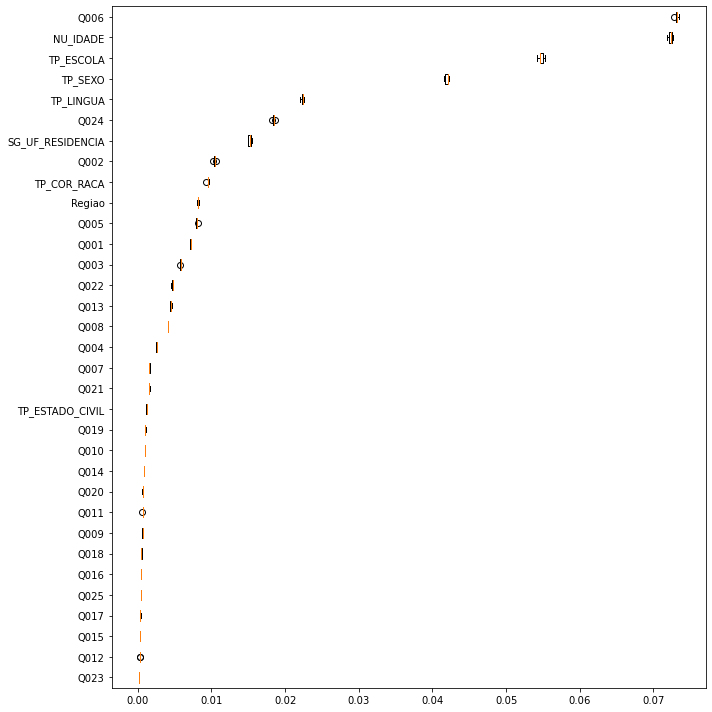

In [11]:
start = time.time()
train, test = train_test_split(data, test_size = 0.3)
model = xgb.XGBRegressor(n_jobs = -1).fit(train.drop("NU_NOTA_MT", 1), train["NU_NOTA_MT"])
r = permutation_importance(model, test.drop("NU_NOTA_MT",1), test["NU_NOTA_MT"], n_repeats = 5)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("NU_NOTA_MT",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Matematica/Permutation_XGBoost.png")
end = time.time()

print("Running time: " + str(end-start))

### Permutation importance with KNN

In [ ]:
start = time.time()
train, test = train_test_split(data, test_size = 0.3)
model = neighbors.KNeighborsRegressor(n_jobs = -1).fit(train.drop("NU_NOTA_MT", 1), train["NU_NOTA_MT"])
r = permutation_importance(model, test.drop("NU_NOTA_MT",1), test["NU_NOTA_MT"], n_repeats = 3)
sorted_idx = r.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(r.importances[sorted_idx].T, vert=False, labels = train.drop("NU_NOTA_MT",1).columns[sorted_idx])
fig.tight_layout()
plt.savefig("../pictures/Matematica/Permutation_KNN.png")
end = time.time()

print("Running time: " + str(end-start))